In [1]:
import tomosipo as ts
import numpy as np
import pickle
import mrcfile
import numpy as np
from scipy.ndimage import zofgltom
from sklearn.manifold import TSNE
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd  
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score
import os
import matplotlib.pyplot as plt

%matplotlib inline


In [8]:
"""
Load 3DVA angles
"""
f = open('./data/angles_3DVA.txt')
text = []
for line in f:
    floats_list = [float(item) for item in line.split()]

    text.append(floats_list[:3])
angles = np.array(text)
print(np.max(angles[:, 0]))
print(np.max(angles[:, 1]))
print(np.max(angles[:, 2]))
angles[:, 0] = angles[:, 0] / 360 * 2 *np.pi
angles[:, 1] = angles[:, 1] / 360 * 1 *np.pi
angles[:, 2] = angles[:, 2] / 360 * 2 *np.pi

print(angles[:5])
print(angles.shape)
angles2 = angles

359.95001
178.00002
359.95105
[[2.28411239 0.59341195 4.10990097]
 [2.05058716 0.90757121 0.37629299]
 [6.10777989 1.46607657 3.30704952]
 [0.75984672 0.38397244 3.59729795]
 [5.85749933 0.57595865 1.49051153]]
(9453, 3)


In [9]:
"""
Load 3DVA order
"""
f = open('./data/70S_5class_simu_labels.txt')
text = []
for line in f:
    intlist = [int(item) for item in line.split()]

    text.append(intlist[0])
print(text[:5])
S_count = []
for i in range(5):
    S_count.append( text.count(i))
    print(i, text.count(i))
Index_3DVA = text
#You can see that the mean structure is 


[3, 0, 2, 0, 2]
0 2804
1 1904
2 1911
3 1417
4 1417


In [10]:
with open('./data/3DVA_images_22_0205.pkl', 'rb') as f:
    new_projection = pickle.load(f)

(9453, 34, 34)


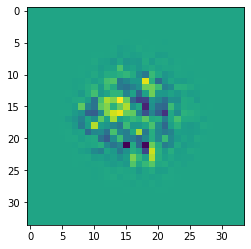

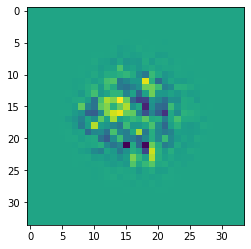

In [11]:
#Add noise 
print(new_projection.shape)
plt.imshow(new_projection[0])
plt.show()
sn_ratio = 0.5
num_imgs = new_projection.shape[0]
img_size = new_projection.shape[-1]


noise_var = new_projection.var()/sn_ratio
#new_projection = new_projection + np.sqrt(noise_var)*np.random.randn(num_imgs, img_size, img_size)
plt.imshow(new_projection[0])
plt.show()

with open(f'3DVA_noisy_data_0205.pkl', 'wb') as f:
    pickle.dump(new_projection, f)

In [12]:
import astra
ProjSize = 34
with open('./data/Orientation_Vectors_3DVA_0205.pkl', 'rb') as handle:
    Orientation_Vectors = pickle.load(handle  )
Orientation_Vectors = Orientation_Vectors
print(Orientation_Vectors.shape)
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
print(Orientation_Vectors.shape)

(9453, 12)
(9453, 12)


In [13]:
from tomosipo.geometry.parallel_vec import *
#pg = ParallelVectorGeometry.from_astra(Proj_geom)
pg = ts.from_astra(Proj_geom)

In [14]:
#vg = ts.volume(shape=(32, 32, 32), size=(1, 1, 1))
#pg = ts.parallel(angles=50, shape=(48, 48), size=(1.5, 1.5))
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
Vol_geom = astra.create_vol_geom(34, 34, 34)
vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
A = ts.operator(vg, pg)
from scipy.ndimage import zoom


In [15]:
print(pg.ray_dir[:5])
print(pg.det_v[:5])
print(pg.det_u[:5])


[[ 0.82903757 -0.46073482  0.31689136]
 [ 0.61566148  0.28957453 -0.73287621]
 [ 0.10452846 -0.16380071  0.98093992]
 [ 0.92718385 -0.16486277  0.33637831]
 [ 0.83867057  0.5428847  -0.04367928]]
[[ 0.42285954  0.88734648  0.18386418]
 [ 0.69903763 -0.62999339  0.33831157]
 [-0.17355138 -0.97421298 -0.14418388]
 [ 0.25803289 -0.3698931  -0.89252345]
 [-0.22490631  0.41825112  0.88004725]]
[[-0.36590506 -0.01842978  0.93046968]
 [-0.36374075 -0.72059345 -0.59028615]
 [ 0.97926182 -0.15517215 -0.13026082]
 [ 0.2715679   0.91433001 -0.3004189 ]
 [ 0.49603309 -0.72824598  0.4728731 ]]


In [16]:
print(Orientation_Vectors[:5])
print(pg[:5])

[[ 0.31689136 -0.46073482  0.82903757  0.          0.          0.
   0.93046968 -0.01842978 -0.36590506  0.18386418  0.88734648  0.42285954]
 [-0.73287621  0.28957453  0.61566148  0.          0.          0.
  -0.59028615 -0.72059345 -0.36374075  0.33831157 -0.62999339  0.69903763]
 [ 0.98093992 -0.16380071  0.10452846  0.          0.          0.
  -0.13026082 -0.15517215  0.97926182 -0.14418388 -0.97421298 -0.17355138]
 [ 0.33637831 -0.16486277  0.92718385  0.          0.          0.
  -0.3004189   0.91433001  0.2715679  -0.89252345 -0.3698931   0.25803289]
 [-0.04367928  0.5428847   0.83867057  0.          0.          0.
   0.4728731  -0.72824598  0.49603309  0.88004725  0.41825112 -0.22490631]]
ts.parallel_vec(
    shape=(34, 34),
    ray_dir=array([[ 0.82903757, -0.46073482,  0.31689136],
       [ 0.61566148,  0.28957453, -0.73287621],
       [ 0.10452846, -0.16380071,  0.98093992],
       [ 0.92718385, -0.16486277,  0.33637831],
       [ 0.83867057,  0.5428847 , -0.04367928]]),
   

In [17]:
"""
Get original mean subtracted structs
"""
with open('./data/3DVA_subtracted_vols34_0205.pkl', 'rb') as  f:
    mean_sbtracted_structs = pickle.load(f)
print(len(mean_sbtracted_structs))
print(type(mean_sbtracted_structs[0]))
for i in range(5):
    mean_sbtracted_structs[i] = mean_sbtracted_structs[i].tolist()
mean_sbtracted_structs = np.array(mean_sbtracted_structs)
print(mean_sbtracted_structs.shape)

5
<class 'numpy.ndarray'>
(5, 34, 34, 34)


In [18]:
from tomosipo.torch_support import to_autograd
import time
"""
First step. write out the
1. Expectation
2. likelihood
Then use .backward solve it


For AU with U with batch n^3, to_autograd take batch input, which is actually what I want!!!!, so no need for one by one concatenate!!!

"""
def reshape_fortran(x, shape):
    if len(x.shape) > 0:
        x = x.permute(*reversed(range(len(x.shape))))
    return x.reshape(*reversed(shape)).permute(*reversed(range(len(shape))))
def Trace_bradcast(a):
    b = torch.einsum('bii->b', a)
    return b
import torch


class MPCA_3d_recon():
    def __init__(self, ProjSize, num_image, n_component, op, Images, exp_name, batch_size = 1000, n_iter = 20):
        #init
        self.exp_name = exp_name
        self.ProjSize  = ProjSize
        self.z_size = n_component # First set 1 for simplicity
        self.num_image = num_image
        self.n_component = n_component
        self.batch_size = batch_size
        self.n_iter = n_iter
        
        """
        projection operator and images
        """
        self.op = to_autograd(op)
        Images = torch.tensor(Images)
        self.All_Image = Images
        self.I = reshape_fortran(Images, (self.num_image, self.ProjSize*self.ProjSize , 1)).float() # N x D^2 x 1
        self.All_I = self.I
        """
        paramters we want to find
        """
        #x = int((ProjSize - self.z_size ) /2)
        self.U1 = torch.eye(self.ProjSize)[:, :self.z_size] +1
        self.U2 = torch.eye(self.ProjSize)[:, :self.z_size] +1 
        self.U3 = torch.eye(self.ProjSize)[:, :self.z_size] +1
        #print('self.U1',self.U1.shape)
        self.U1.data = torch.qr(self.U1.data)[0]
        self.U2.data = torch.qr(self.U2.data)[0]
        self.U3.data = torch.qr(self.U3.data)[0]
        #print('ortho_U1',ortho_U1.shape)
        #print(ortho_U1.T@ortho_U1)
        #self.mask = torch.eye(self.ProjSize)[:, x : x + self.z_size]
        
        self.U1.requires_grad =True
        self.U2.requires_grad =True
        self.U3.requires_grad =True
        self.All_U = torch.kron(self.U1, torch.kron(self.U2, self.U3))
        self.Sigma_Z_inv = torch.eye(self.n_component ** 3) # size: p1 x p2 x p3 
        self.sigma = torch.ones(self.batch_size).reshape(-1, 1 ,1) * 1
        #print('sigma monotoring',torch.mean(self.sigma))
        """
        Expectation term
        or so called missing data
        """
        self.mu = torch.abs(torch.ones((self.batch_size, n_component **3,1)))
        self.BigSigma_I = torch.abs(torch.ones((self.batch_size, self.n_component**3, self.n_component**3 )))

       

    def A_pro_All_U(self, detach_list = []):
        #print('in A por U')
        #self.All_U # shape = Ps ^3 x n  ^3: which we should make it Ps x Ps x Ps x n ^3 to process
        #A: Ps x Ps x Ps x 1 ->  Ps x Ps x 1
        
        #So overal, we have Mu = N x D^3 x n^3
        #AMu = N x D^2 x n^3
        """
        for i in range(self.n_component**3):
            Vol_i = self.All_U[:, i].reshape(self.ProjSize, self.ProjSize,self.ProjSize)
            Proj_i = self.op(Vol_i).permute(1, 0, 2)
            Proj_i = reshape_fortran(Proj_i, (self.num_image, self.ProjSize*self.ProjSize ,1))
            
            #print(Proj_i.shape)
            if i == 0:
                self.AU = Proj_i
            else:
                self.AU = torch.cat((self.AU, Proj_i), 2)
        #print('self.AU',self.AU.shape)
        
        #Broad cast: torch.matmul
        # (AU).T(AU) = torch.matmul(self.AU.permute(0,2,1), self.AU.permute(0,2,1))
        #torch.matmul(self.AU.permute(0,2,1), self.AU)
        """
        U1 , U2, U3 = self.U1, self.U2, self.U3
        if 1 in detach_list:
            U1 = U1.detach()
        if 2 in detach_list:
            U2 = U2.detach()
        if 3 in detach_list:
            U3 = U3.detach()
        
        
        self.All_U = torch.kron(U1, torch.kron(U2, U3))
        self.All_U_kron_shape = self.All_U
        self.All_U = reshape_fortran(self.All_U, (self.ProjSize, self.ProjSize, self.ProjSize, self.n_component**3)) #D^3 x n^3 -> D xD x D x n^3
        self.All_U = self.All_U.permute(3, 0, 1, 2) # make it n x Dx Dx D
        #print(self.All_U.shape)
        self.AU = self.op( self.All_U) # n x Dx Dx D -> n x D x N x D
        #print('self.AU',self.AU.shape)
        self.AU = self.AU.permute(2, 0, 1, 3) # N x n x D x D
        #print( self.AU.permute(2, 0, 1, 3).shape)
        self.AU = reshape_fortran(self.AU, (self.batch_size, self.n_component**3, self.ProjSize**2))
        self.AU = self.AU.permute(0, 2, 1) # N x n x D x D
        
        #print('self.AU',self.AU.shape)
        
    def Expectation(self):
        #print('in Exp')
        
        """
        First, get all projection information
        
        ro_j = 1/sigma^2 * (Sigmz_Z_inv + 1/sigma^2 * (Au)^TAu)^(-1)(Au)^TI
        
        #We expect to get a n_image x n_component matrix for ro
        
        BigSigma = I - 1 / sigma^2 * (I + 1/sigma^2 * (Au)^TAu)^(-1) (Au)^TAu9htu
        
        Here, the shape of All_U is PS^3 x n_component^3, but A can only process a 3d volume PS^3 at once
        
        """
        #print(torch.unsqueeze(self.Sigma_Z_inv,0  ).shape)
        #print((1 / self.sigma **2).shape)
        
        UTATAU = torch.matmul(self.AU.permute(0,2,1), self.AU)
        #print(UTAAU.shape)
        #print((1 / self.sigma **2 * UTAAU ).shape)
        self.mu = torch.inverse(torch.unsqueeze(self.Sigma_Z_inv,0  ) + 1 / self.sigma **2 * UTATAU ) * 1 / self.sigma **2 
        self.mu = torch.matmul(self.mu , self.AU.permute(0,2,1))
        self.mu = torch.matmul(self.mu, self.I)
        #print('self.mu.shape',self.mu.shape)
        
        
        """
        So we found Mu
        Then we found Sigma_I
        torch.inverse can broadcast through batch, so just use it
        """
        self.BigSigma_I = torch.inverse((torch.unsqueeze(self.Sigma_Z_inv,0  ) + 1 / self.sigma **2 * UTATAU )) + torch.matmul(self.mu, self.mu.permute(0,2,1))
        #print('self.BigSigma_I', self.BigSigma_I.shape)
        self.mu = self.mu.detach()
        self.BigSigma_I = self.BigSigma_I.detach()
        #print('torch.mean(self.mu)', torch.mean(self.mu))
        #print('torch.mean(self.BigSigma_I)', torch.mean(self.BigSigma_I))
        
    def Q_Function(self, ):
        #print('in Q')
        """
        #left term
        #print('self.AU', torch.mean(self.AU))
        print('in Q')
        print('self.mu ', torch.mean(self.mu ))
        print('self.BigSigma_I', torch.mean(self.BigSigma_I))
        #print('self.sigma', torch.mean(self.sigma))
        print('self.Sigma_Z_inv',torch.mean(self.Sigma_Z_inv))
        print('self.U1', torch.mean(self.U1))
        print('self.U2', torch.mean(self.U2))
        print('self.U3', torch.mean(self.U3))
        
        try:
            print('self.U1.grad.data',torch.mean(self.U1.grad.data))
            print('self.U2.grad.data',torch.mean(self.U2.grad.data))
            print('self.U3.grad.data',torch.mean(self.U3.grad.data))
        
        except:
            pass
        """
        
        left = -2 * self.I.permute(0, 2, 1) @ self.AU @ self.mu 
        #UTATAU = torch.matmul(self.AU.permute(0,2,1), self.AU)
        #print('self.AU', self.AU.shape)
        #print('self.BigSigma_I', self.BigSigma_I.shape)
        #print('self.AU.permute(0,2,1)', self.AU.permute(0,2,1).shape)
        left = left + Trace_bradcast(self.AU @ self.BigSigma_I @ self.AU.permute(0,2,1))   #self.mu.permute(0, 2, 1) @  UTATAU @ self.mu
        left = 1 / self.sigma **2 *left
        
        #middle term
        #print('self.mu', self.mu.shape)
        #print('torch.unsqueeze(self.Sigma_Z_inv,0  )', torch.unsqueeze(self.Sigma_Z_inv,0  ).shape)
        #middle = self.mu.permute(0, 2, 1)  @torch.unsqueeze(self.Sigma_Z_inv,0  ) @self.mu
        middle = Trace_bradcast( torch.unsqueeze(self.Sigma_Z_inv,0  ) @ self.BigSigma_I )
        
        
        right = torch.log(torch.det(torch.inverse(self.Sigma_Z_inv)))
        self.Q = -1/2 * torch.sum(left + middle + right)/100000000
        #print('self.Q',self.Q.shape,self.Q)
        #print(self.Q)
    def Maximization(self, ratio):
        #print('in max')
        """
        Update U1, U2, U3 by gradient assent and use svd to make sure orthogonality
        self.U1.grad.data.zero_() # conduct zero grad
        self.Q.backward()
        
        """
        self.Sigma_Z_inv = torch.inverse(torch.mean(self.BigSigma_I, 0)).detach()
        #print('self.Sigma_Z_inv ', torch.mean(self.Sigma_Z_inv ))
        
        start = time.time()
        
        self.A_pro_All_U([2,3])
        self.Q_Function()
        #print('q fun ction time', time.time()- start)
        self.Q.backward()
        #print('backward time', time.time()- start)
        
        lr = torch.mean(torch.abs(self.U1)) /  torch.mean(torch.abs(self.U1.grad)) * ratio# 0.01
        #print('torch.mean(torch.abs(self.U1.grad))', torch.mean(torch.abs(self.U1.grad)))
        self.U1.data +=  lr * self.U1.grad.data
        self.U1.data = torch.qr(self.U1.data)[0] 
        
        self.U1.grad.data.zero_()

        #print('update time', time.time()- start)
        
        self.A_pro_All_U()
        #print('AU time', time.time()- start)
        ##self.Expectation()
        #print('expectation time', time.time()- start)
        
        
        self.A_pro_All_U([1,3])
        self.Q_Function()
        self.Q.backward()
        lr = torch.mean(torch.abs(self.U2)) /  torch.mean(torch.abs(self.U2.grad))* ratio#0.01
        self.U2.data += lr * self.U2.grad.data
        self.U2.data = torch.qr(self.U2.data)[0] 
        
        self.U2.grad.data.zero_()
        self.A_pro_All_U()
        #self.Expectation()
        
        
        self.A_pro_All_U([1,2])
        self.Q_Function()
        self.Q.backward()
        
        lr = torch.mean(torch.abs(self.U3)) /  torch.mean(torch.abs(self.U3.grad))* ratio#0.01
        self.U3.data += lr * self.U3.grad.data
        self.U3.data = torch.qr(self.U3.data)[0] 
        
        self.U3.grad.data.zero_()
        self.A_pro_All_U()
        #self.Expectation()
        print(time.time()-start, 'sec')
        #lr = np.abs(np.mean(self.mu) / np.mean(DeltaMu) )*0.001
        #self.mu = self.mu + lr * DeltaMu
        """
        lr = torch.mean(torch.abs(self.U1)) /  torch.mean(torch.abs(self.U1.grad)) * ratio# 0.01
        self.U1.data +=  lr * self.U1.grad.data
        
        lr = torch.mean(torch.abs(self.U2)) /  torch.mean(torch.abs(self.U2.grad))* ratio#0.01
        self.U2.data += lr * self.U2.grad.data
        
        lr = torch.mean(torch.abs(self.U3)) /  torch.mean(torch.abs(self.U3.grad))* ratio#0.01
        self.U3.data += lr * self.U3.grad.data
        
        self.U1.data = torch.qr(self.U1.data)[0]
        self.U2.data = torch.qr(self.U2.data)[0]
        self.U3.data = torch.qr(self.U3.data)[0]
        #print('self.U1.grad.data',torch.mean(self.U1.grad.data))
        ##print('self.U2.grad.data',torch.mean(self.U2.grad.data))
        #print('self.U3.grad.data',torch.mean(self.U3.grad.data))
        
        self.U1.grad.data.zero_()
        self.U2.grad.data.zero_()
        self.U3.grad.data.zero_()
        self.A_pro_All_U()
        """
        #print('self.I.permute(0, 2, 1) @ self.I', (self.I.permute(0, 2, 1) @ self.I).shape)
        #print('-2 * self.I.permute(0, 2, 1) @ self.AU @ self.mu', (-2 * self.I.permute(0, 2, 1) @ self.AU @ self.mu).shape)
        #print('Trace_bradcast(self.AU @ self.BigSigma_I @ self.AU.permute(0,2,1))', (Trace_bradcast(self.AU @ self.BigSigma_I @ self.AU.permute(0,2,1))).shape)
        self.sigma = self.I.permute(0, 2, 1) @ self.I -2 * self.I.permute(0, 2, 1) @ self.AU @ self.mu  + (Trace_bradcast(self.AU @ self.BigSigma_I @ self.AU.permute(0,2,1))).reshape(-1, 1, 1)
        #print('self.sigma',self.sigma.shape)
        self.sigma = self.sigma.detach() / self.ProjSize ** 2
        #print('sigma monotoring',torch.mean(self.sigma))
        #print('sigma monotoring min',torch.min(self.sigma))
        #print('sigma monotoring max',torch.max(self.sigma))
        #print(' self.I.permute(0, 2, 1) @ self.I',  (self.I.permute(0, 2, 1) @ self.I).shape)
        #print('self.sigma',self.sigma.shape)
    def Plot_temp(self, num = 10):
        #print('monotor sigma j max', torch.max(self.sigma))
        fig,axes=plt.subplots(1,num, figsize=(20, 200))
        print('generated')
        for i in range(num):
            est_I = self.AU @ self.mu
            AU = est_I.detach().numpy()
            image = AU[i].reshape(self.ProjSize,self.ProjSize, order = 'F')
            axes[i].imshow(image)
        plt.show()
        fig,axes=plt.subplots(1,num , figsize=(20, 200))
        print('real')
        for i in range(num):
            #est_I = self.AU @ self.mu
            #AU = est_I.detach().numpy()
            axes[ i].imshow(self.Images[i])
        plt.show()
        
        """
        c = 0
        print('generated')
        est_I = self.AU @ self.mu
        AU = est_I.detach().numpy()
        #print(AU.shape)
        image = AU[c].reshape(self.ProjSize,self.ProjSize, order = 'F')
        plt.imshow(image) # quarter rotation
        plt.show()
        #MP3.Q_Function()

        #MP3.Maximization()
        print('real')
        plt.imshow(Images[c])
        plt.show()
        
        c = 11
        print('generated')
        #AU = self.AU.detach().numpy()
        #print(AU.shape)
        image = AU[c].reshape(self.ProjSize,self.ProjSize, order = 'F')
        plt.imshow(image) # quarter rotation
        plt.show()
        #MP3.Q_Function()

        #MP3.Maximization()
        print('real')
        plt.imshow(Images[c])
        plt.show()
        """
        
        
        
    def fit(self, start_ratio):
        
        """
        If doing SGD, set self.I as part of the images, then the following code run aotumatically.
        Use np.random.permutation(5000)
        self.All_I 
        """
        
        ratio = start_ratio
        """
        ratio = start_ratio
        self.A_pro_All_U()
        self.Expectation()
        print('oritinal')
        self.Plot_temp()
        """
        
        temp = []
        for i in range(1):
            
            order = np.random.permutation(self.num_image)
            
            
            self.Draw_Kmean_tsne(0)
            self.A_pro_All_U()
            self.Plot_temp()
            #for j in range(int(self.num_image / self.batch_size)):
            for j in range(1, self.n_iter+1):
                #continue
                batch_order = order[self.batch_size * j : self.batch_size * (j + 1) ]
                self.I = self.All_I[batch_order] 
                self.Images = self.All_Image[batch_order]
                #print('self.I.shape', self.I.shape)
                #print('batch_order', batch_order.shape)
                
                #Update op
                Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors[batch_order])
                Vol_geom = astra.create_vol_geom(34, 34, 34)
                vg = ts.from_astra(Vol_geom)
                pg = ts.from_astra(Proj_geom)
                op = ts.operator(vg, pg)
                self.op = to_autograd(op)
                
                self.A_pro_All_U()
                #self.Q_Function()
                #self.Plot_temp()
                #self.Q_Function()
                self.Expectation()
                self.Q_Function()
                self.Maximization(ratio)
                print(f'{i} batch {j} iteration')
                self.Plot_temp()
                torch.save(self.U1, f'./snap_shot/{self.exp_name}_{i}th_{j}_U1.pt')
                torch.save(self.U2, f'./snap_shot/{self.exp_name}_{i}th_{j}_U2.pt')
                torch.save(self.U3, f'./snap_shot/{self.exp_name}_{i}th_{j}_U3.pt')
                if j % 3 == 1:
                    self.Draw_Kmean_tsne(j)
                #self.Plot_temp()
                if j % 6 == 5:
                    print('ratio / 5')
                    ratio = ratio / 10
            #if i % 3 ==0:
            print(f'the {i} th iter')
            #self.Plot_temp()
            
            temp.append([self.U1.data, self.U2.data, self.U3.data])
            with open(f'./snap_shot/{self.exp_name}_MPCA.pkl', 'wb') as f:
                pickle.dump(temp, f)
            torch.save(self.U1, f'./snap_shot/{self.exp_name}_{i}th_U1.pt')
            torch.save(self.U2, f'./snap_shot/{self.exp_name}_{i}th_U2.pt')
            torch.save(self.U3, f'./snap_shot/{self.exp_name}_{i}th_U3.pt')
            #use torch save to save torch tensor
            self.Draw_Kmean_tsne(j)
            
    def Output_colection(self, n = 8):
        
        """
        If doing SGD, set self.I as part of the images, then the following code run aotumatically.
        Use np.random.permutation(5000)
        self.All_I 
        """
       
        
        temp = []

        order = np.array([i for i in range(self.num_image)])[- n * self.batch_size:]
        for j in range(n):
            batch_order = order[self.batch_size * j : self.batch_size * (j + 1) ]
            self.I = self.All_I[batch_order] 
            self.Images = self.All_Image[batch_order]
            #print('self.I.shape', self.I.shape)
            #print('batch_order', batch_order.shape)

            #Update op
            Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors[batch_order])
            Vol_geom = astra.create_vol_geom(34, 34, 34)
            vg = ts.from_astra(Vol_geom)
            pg = ts.from_astra(Proj_geom)
            op = ts.operator(vg, pg)
            self.op = to_autograd(op)

            self.A_pro_All_U()
            #self.Q_Function()
            #self.Plot_temp()
            #self.Q_Function()
            self.Expectation()
            #self.Plot_temp()
            temp.extend(self.mu.detach().numpy().tolist())
        self.All_mu = temp
        with open(f'./snap_shot/{self.exp_name}_all_mu.pkl', 'wb') as f:
            pickle.dump(self.All_mu , f)
    def Draw_Kmean_tsne(self, iter_, true_index = Index_3DVA[:9200]):
        #num_batch = int(9200 / self.batch_size)
        num_batch = 4
        self.Output_colection(num_batch)
        indexs = true_index[-num_batch * self.batch_size:]
        np.random.seed(0)
        Coef = np.array(self.All_mu)
        tsne = TSNE(n_components=2, verbose=1, random_state=123)
        Coef = Coef.reshape(Coef.shape[0], -1)
        pca = PCA(n_components=5)
        pca.fit(Coef)
        P_Coef = pca.transform(Coef)
        self.P_Coef = P_Coef
        self.PCs = pca.components_
        z = tsne.fit_transform(P_Coef) 
        self.Projected_var()
        
        kmeans = KMeans(n_clusters=5, random_state=0).fit(P_Coef) #k-mean perform on PCA coef
        kmeans.labels_
        vs = v_measure_score(indexs, kmeans.labels_)
        df = pd.DataFrame()
        df["y"] = kmeans.labels_
        df["comp-1"] = z[:,0]
        df["comp-2"] = z[:,1]

        sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                        palette=sns.color_palette("hls", 5),
                        data=df).set(title=f"n = {self.z_size} 5Ribsome data k-mean at iter-{iter_} \n vm = {str(vs)[:6]} log_proj_var ={torch.log(self.projected_var):.2f} log_ori_var={torch.log(self.ori_var):.2f}") 
        os.makedirs(os.path.dirname(f'./TSNE_result/{self.exp_name}/n = {self.z_size} 5Ribsome data k-mean at iter-{iter_} vm = {vs} log_proj_var ={torch.log(self.projected_var):.2f}.jpg'), exist_ok = True)
        plt.savefig(f'./TSNE_result/{self.exp_name}/n = {self.z_size} 5Ribsome data k-mean at iter-{iter_} vm = {str(vs)[:6]} log_proj_var ={torch.log(self.projected_var):.2f}.jpg')
        plt.show()
        
        plt.close()
       # print(indexs[:10])
        df = pd.DataFrame()
        df["y"] = indexs
        df["comp-1"] = z[:,0]
        df["comp-2"] = z[:,1]

        sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                        palette=sns.color_palette("hls", 5),
                        data=df).set(title=f"n = {self.z_size} 5Ribsome data true_index at iter-{iter_}\n vm = {str(vs)[:6]} log_proj_var ={torch.log(self.projected_var):.2f} log_ori_var={torch.log(self.ori_var):.2f}") 
        plt.savefig(f'./TSNE_result/{self.exp_name}/n = {self.z_size} 5Ribsome data true_index at iter-{iter_} vm = {str(vs)[:6]} log_proj_var ={torch.log(self.projected_var):.2f}.jpg')
        plt.show()
        plt.close()
        
        
    def Projected_var(self, ms_strucs = mean_sbtracted_structs):
        """
        self.All_U # V^3 x n_component ^ 3
        self.PCs # n_component ^ 3 x n_pcs
        ms_strucs # 5 x v x v x v
        return :
        self.I = reshape_fortran(Images, (self.num_image, self.ProjSize*self.ProjSize , 1)).float()
        """
        
        self.PCs = torch.permute(torch.tensor(self.PCs), (1, 0)).float()
        print('self.All_U_kron_shape', self.All_U_kron_shape.shape)
        print('self.PCs.shape', self.PCs.shape)
        
        self.two_SDR_PCs = self.All_U_kron_shape @ self.PCs #V^3 x n_pcs
        #print(self.two_SDR_PCs.T @self.two_SDR_PCs  ) # chekced! orthonormal!
        ms_strucs = torch.tensor(ms_strucs)
        #print('ms_strucs', ms_strucs.shape)
        #print('self.n_component', self.n_component)
        self.ms_strucs = reshape_fortran(ms_strucs, (5, self.ProjSize*self.ProjSize*self.ProjSize)).float()
        self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))
        
        #print('original variance = ',torch.sum(self.ms_strucs * self.ms_strucs))
        
        projected_struct = self.two_SDR_PCs.T @ self.ms_strucs
        #print('original variance = ',torch.sum(projected_struct * projected_struct))
        self.ori_var = torch.sum(self.ms_strucs * self.ms_strucs)
        self.projected_var = torch.sum(projected_struct * projected_struct)
        
        self.ori_var_each = torch.sum(self.ms_strucs * self.ms_strucs, axis = 0)
        self.projected_var_each = torch.sum(projected_struct * projected_struct, axis = 0)
        print('self.ori_var_each', self.ori_var_each/(1e12))
        print('self.projected_var_each', self.projected_var_each/(1e12))
        
        

(9200, 34, 34)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.002s...
[t-SNE] Computed neighbors for 1600 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 5.936942
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.891151
[t-SNE] KL divergence after 1000 iterations: 0.975160
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([1.3559, 3.8191, 2.9769, 0.4142, 6.4958], grad_fn=<DivBackward0>)


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


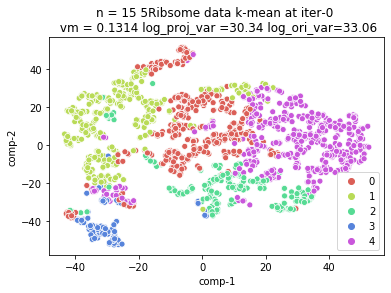

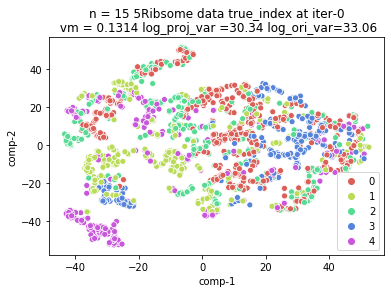

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


generated


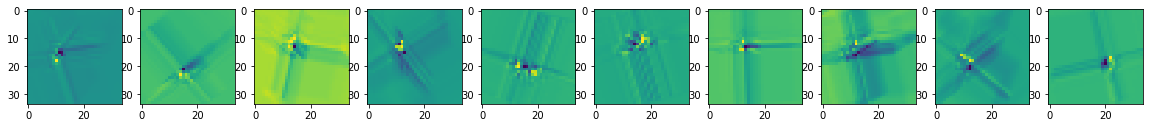

real


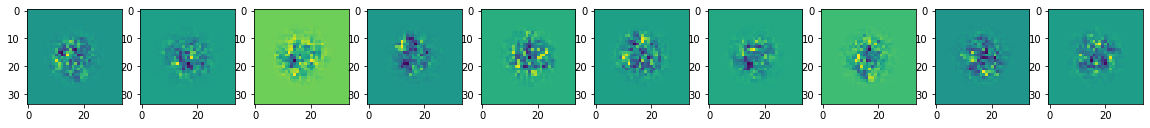

561.2210512161255 sec
0 batch 1 iteration
generated


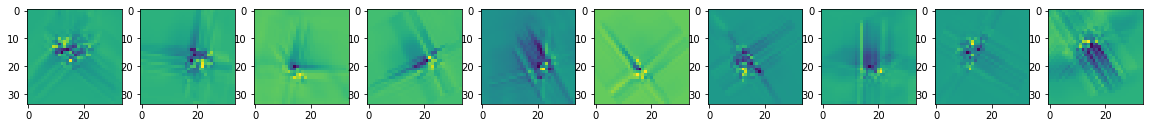

real


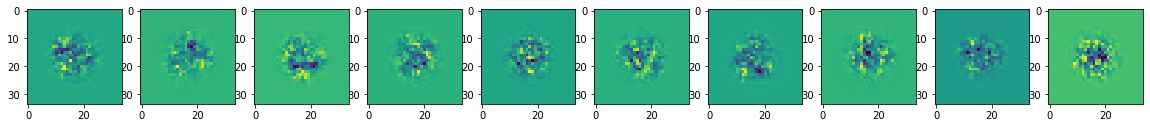

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.001s...
[t-SNE] Computed neighbors for 1600 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 2.193372
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.959518
[t-SNE] KL divergence after 1000 iterations: 0.942861
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([ 6.7712, 19.4686, 12.8773,  1.8645, 26.7217], grad_fn=<DivBackward0>)


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


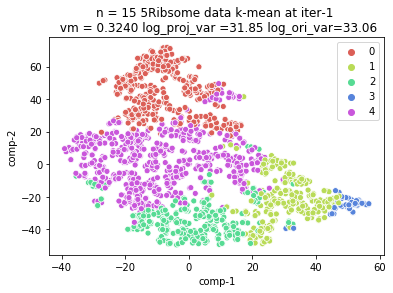

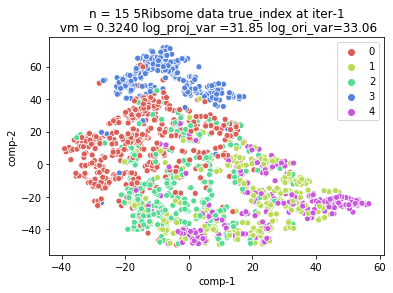

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


550.2919743061066 sec
0 batch 2 iteration
generated


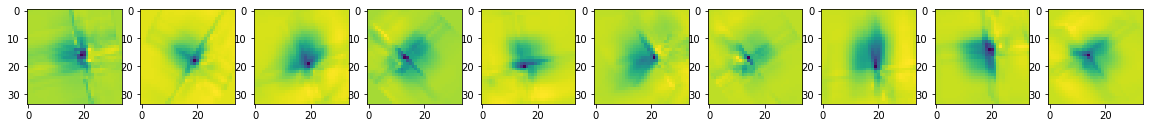

real


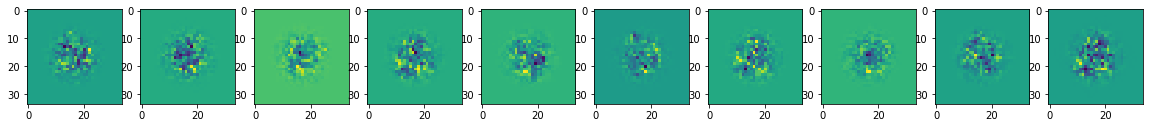

564.626318693161 sec
0 batch 3 iteration
generated


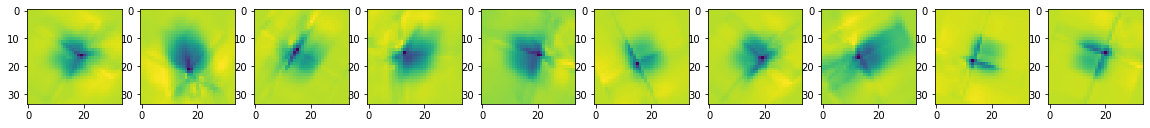

real


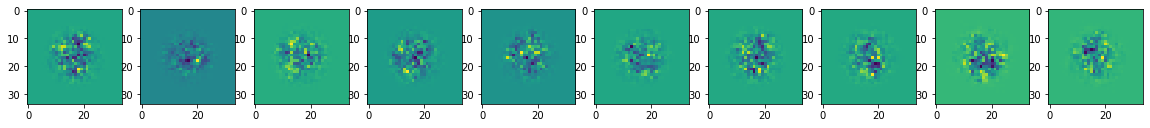

567.7411530017853 sec
0 batch 4 iteration
generated


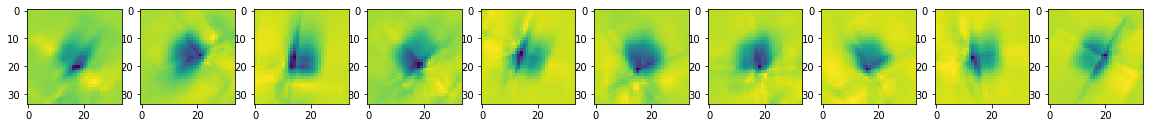

real


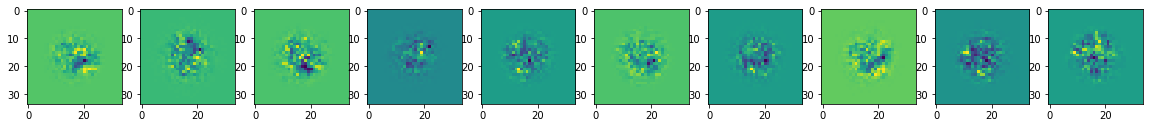

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.002s...
[t-SNE] Computed neighbors for 1600 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 1.000980
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.787647
[t-SNE] KL divergence after 1000 iterations: 0.687838
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([ 8.8741, 27.5739, 16.4562,  2.4842, 37.7058], grad_fn=<DivBackward0>)


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


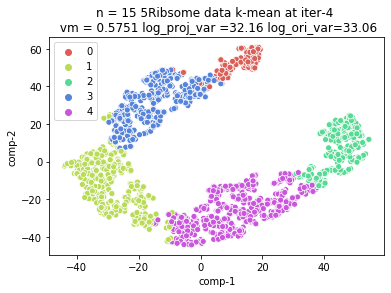

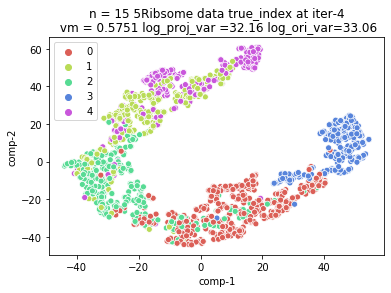

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


557.4439194202423 sec
0 batch 5 iteration
generated


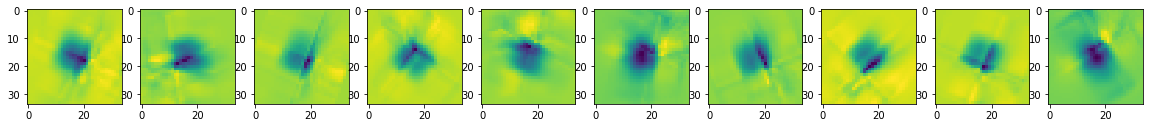

real


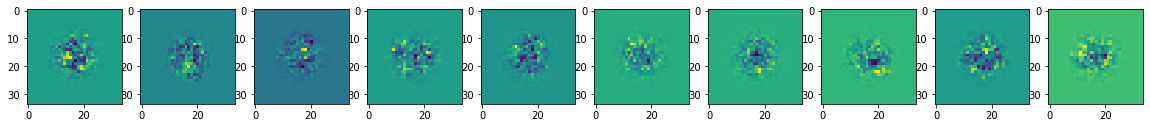

ratio / 5
556.4195189476013 sec
0 batch 6 iteration
generated


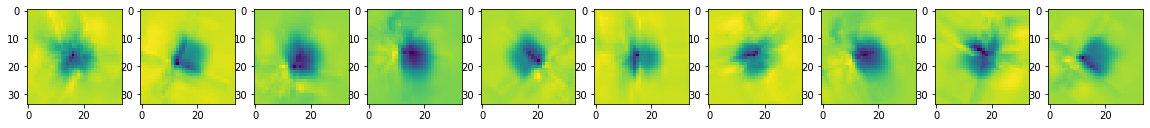

real


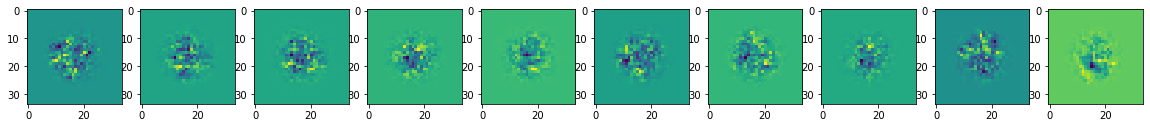

538.2323870658875 sec
0 batch 7 iteration
generated


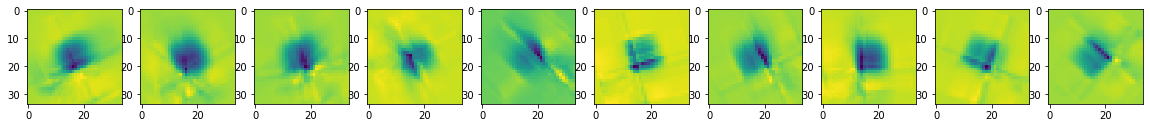

real


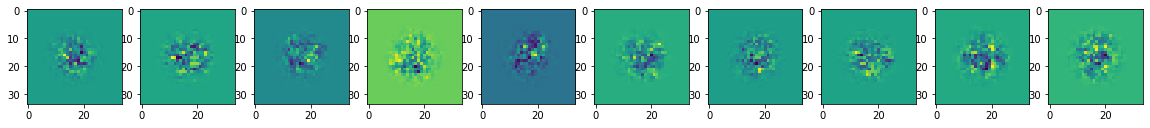

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.001s...
[t-SNE] Computed neighbors for 1600 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 0.926469
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.202568
[t-SNE] KL divergence after 1000 iterations: 0.600813
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([ 8.9766, 27.4912, 16.2880,  2.4751, 36.7414], grad_fn=<DivBackward0>)


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


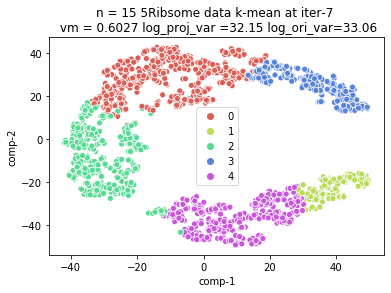

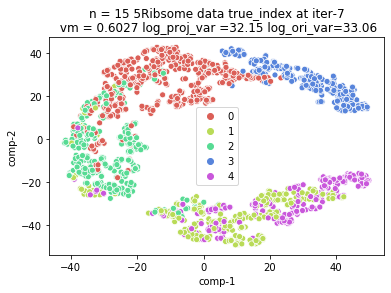

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


556.8412737846375 sec
0 batch 8 iteration
generated


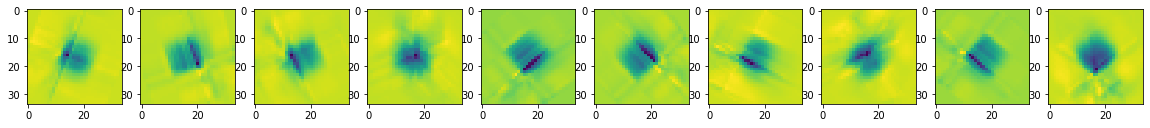

real


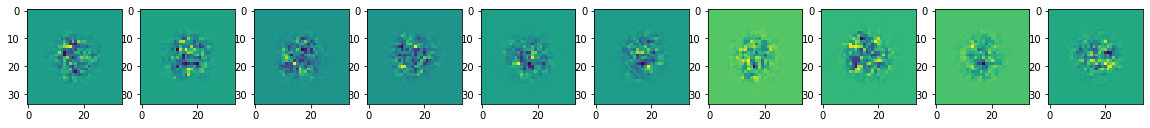

576.3561174869537 sec
0 batch 9 iteration
generated


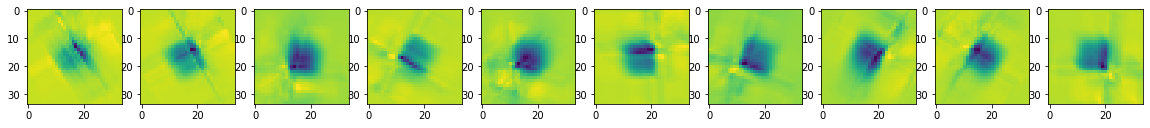

real


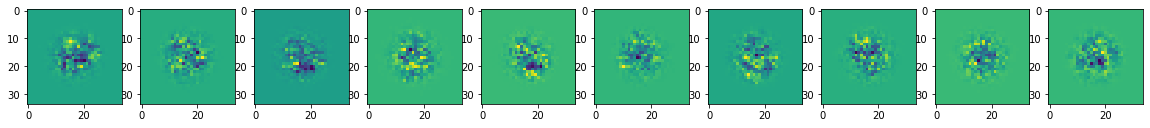

543.5995292663574 sec
0 batch 10 iteration
generated


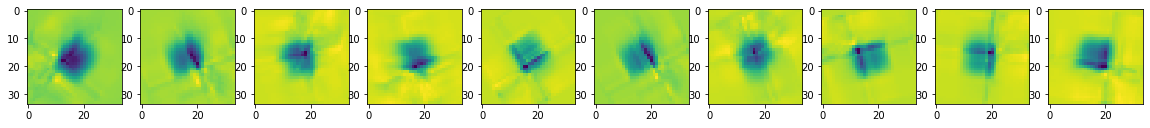

real


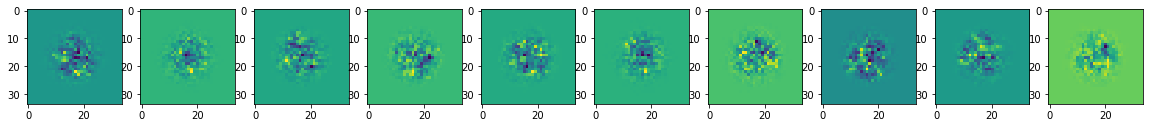

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.001s...
[t-SNE] Computed neighbors for 1600 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 0.849519
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.942989
[t-SNE] KL divergence after 1000 iterations: 0.575554
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([ 9.0523, 27.5671, 16.3673,  2.4873, 36.8208], grad_fn=<DivBackward0>)


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


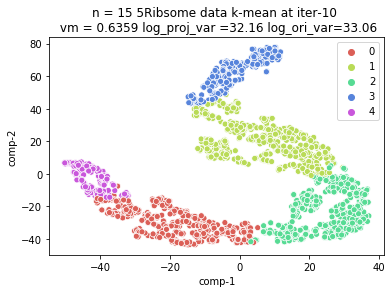

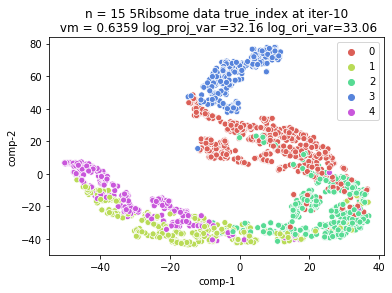

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


567.9771447181702 sec
0 batch 11 iteration
generated


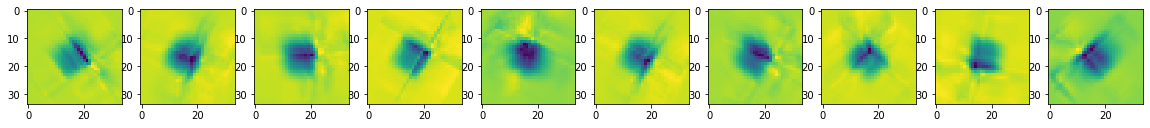

real


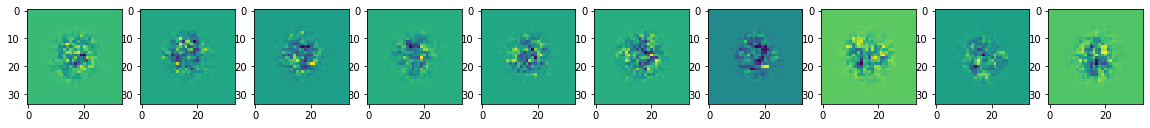

ratio / 5
536.7831530570984 sec
0 batch 12 iteration
generated


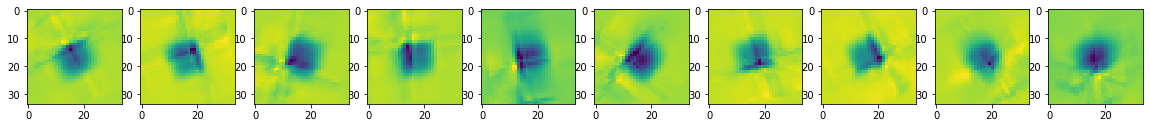

real


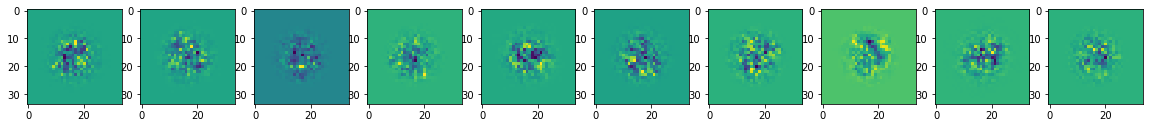

551.0193140506744 sec
0 batch 13 iteration
generated


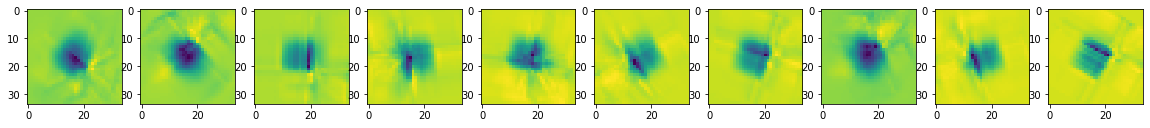

real


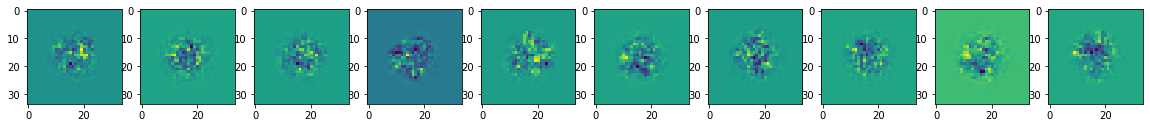

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.001s...
[t-SNE] Computed neighbors for 1600 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 0.785538
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.690811
[t-SNE] KL divergence after 1000 iterations: 0.546955
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([ 9.0615, 27.6316, 16.3367,  2.5005, 36.9458], grad_fn=<DivBackward0>)


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


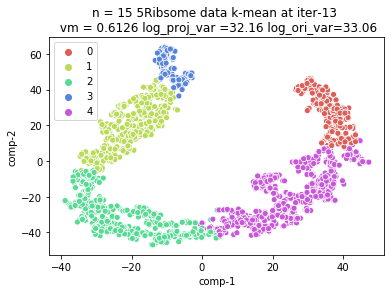

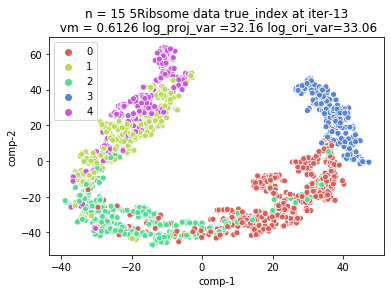

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


540.9372527599335 sec
0 batch 14 iteration
generated


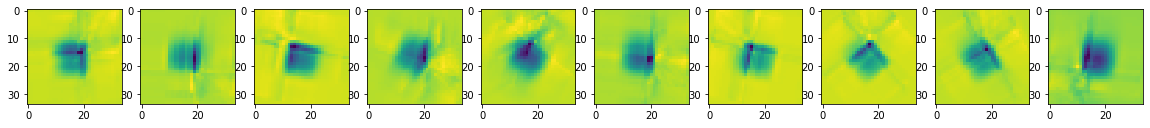

real


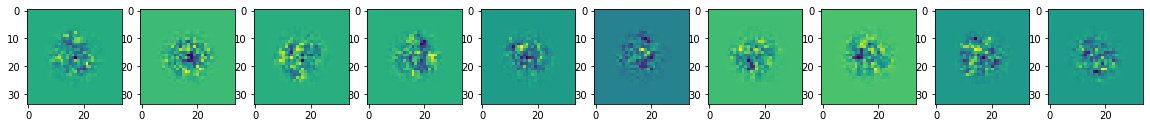

582.6922154426575 sec
0 batch 15 iteration
generated


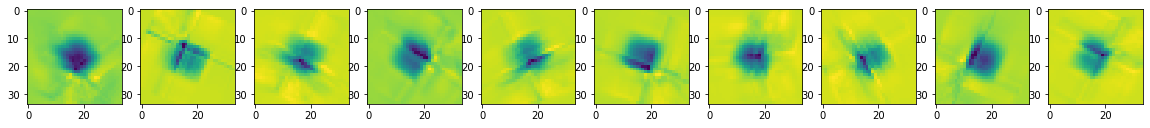

real


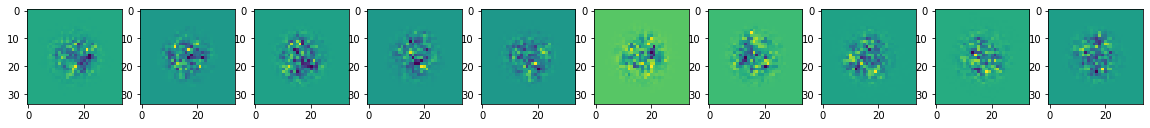

543.062771320343 sec
0 batch 16 iteration
generated


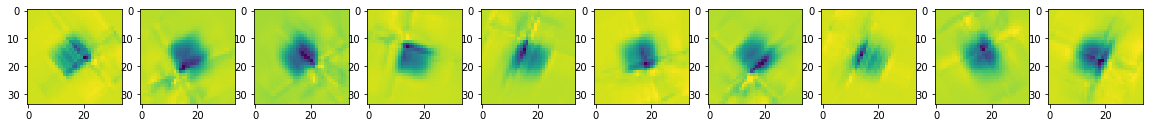

real


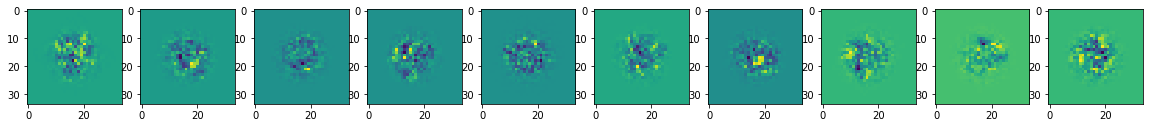

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.002s...
[t-SNE] Computed neighbors for 1600 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 0.752410
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.835636
[t-SNE] KL divergence after 1000 iterations: 0.548924
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([ 9.0051, 27.6262, 16.2600,  2.4967, 36.9840], grad_fn=<DivBackward0>)


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


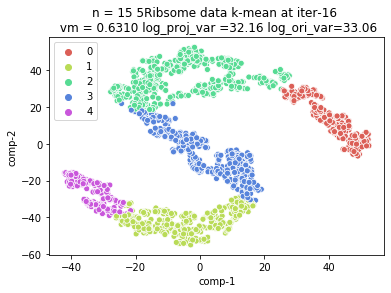

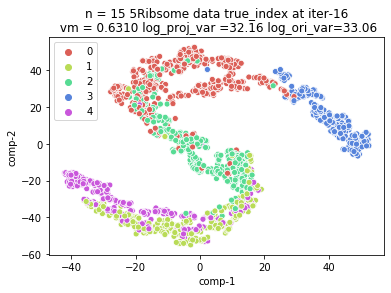

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


553.8797132968903 sec
0 batch 17 iteration
generated


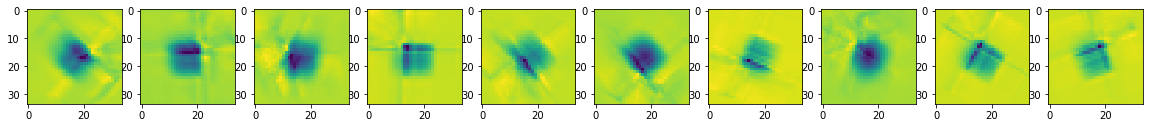

real


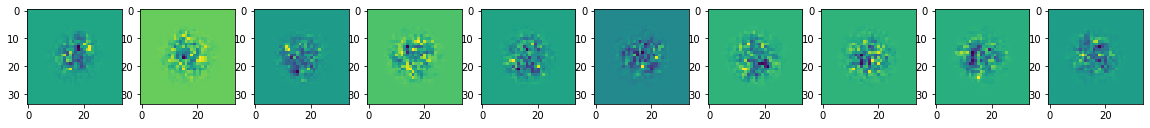

ratio / 5
535.0148639678955 sec
0 batch 18 iteration
generated


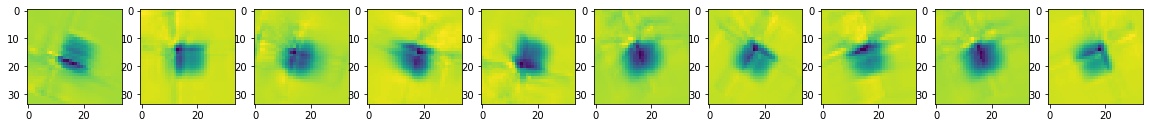

real


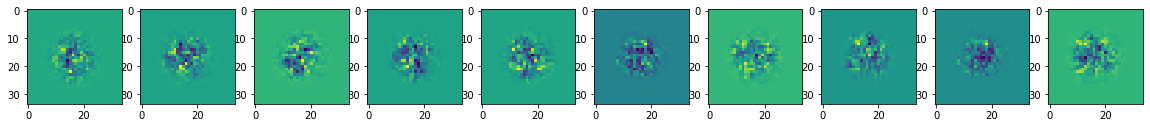

543.6828663349152 sec
0 batch 19 iteration
generated


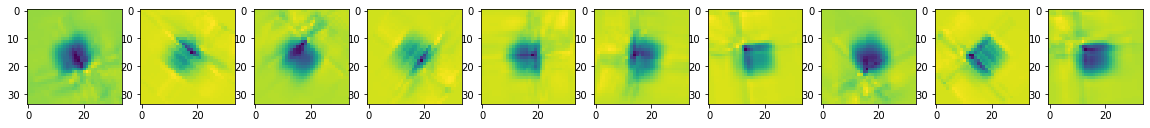

real


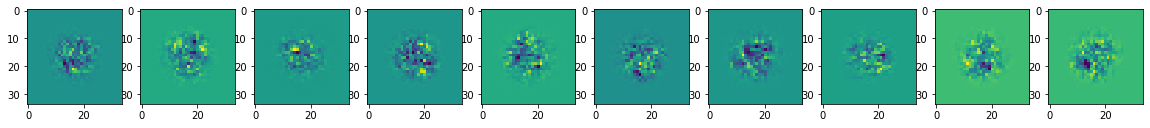

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.001s...
[t-SNE] Computed neighbors for 1600 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 0.735600
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.588718
[t-SNE] KL divergence after 1000 iterations: 0.530345
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([ 8.9804, 27.5577, 16.1438,  2.4700, 36.8153], grad_fn=<DivBackward0>)


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


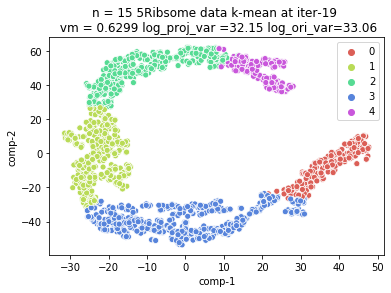

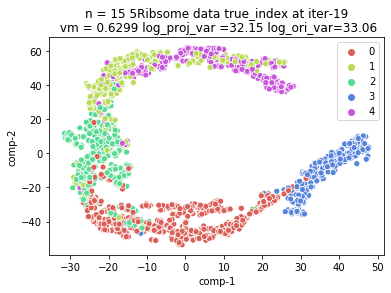

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


568.759073972702 sec
0 batch 20 iteration
generated


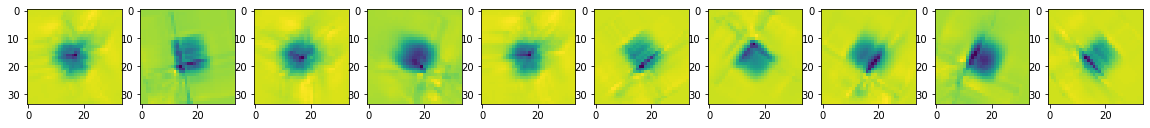

real


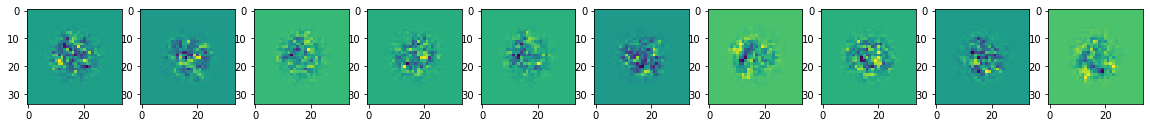

the 0 th iter
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.001s...
[t-SNE] Computed neighbors for 1600 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 0.716764
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.503983
[t-SNE] KL divergence after 1000 iterations: 0.526677
self.All_U_kron_shape torch.Size([39304, 3375])
self.PCs.shape torch.Size([3375, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([ 8.9712, 27.5022, 16.1549,  2.4627, 36.8189], grad_fn=<DivBackward0>)


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


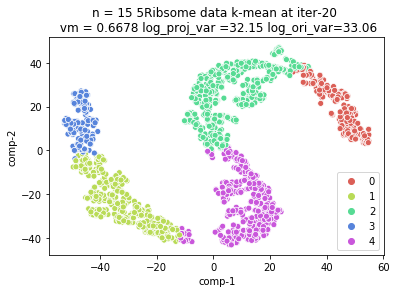

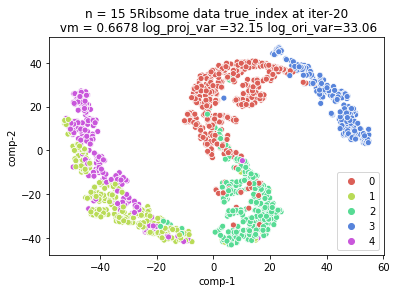

(9200, 34, 34)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.002s...
[t-SNE] Computed neighbors for 1600 samples in 0.057s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 6.041826
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.099861
[t-SNE] KL divergence after 1000 iterations: 0.886950
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([ 2.0715,  7.8520,  4.4594,  0.4279, 12.0771], grad_fn=<DivBackward0>)


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


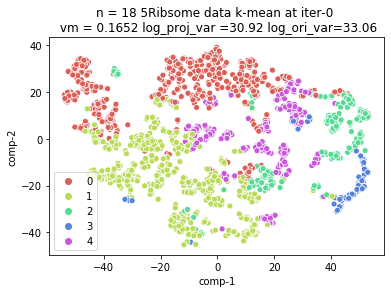

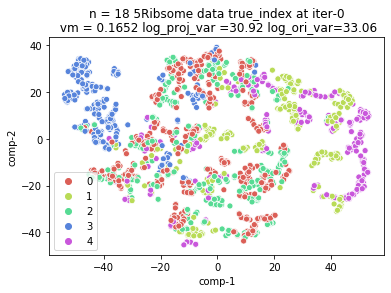

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


generated


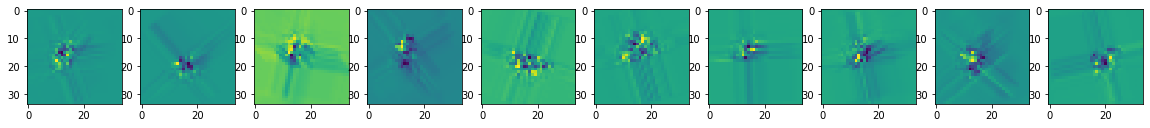

real


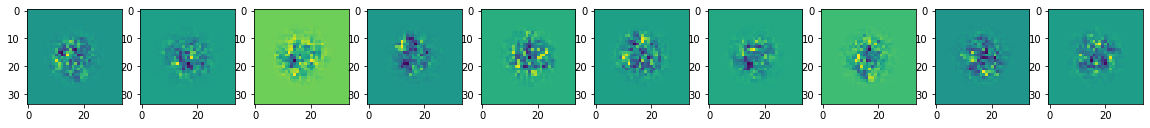

1187.9922316074371 sec
0 batch 1 iteration
generated


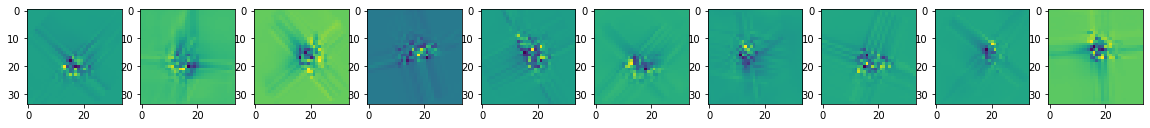

real


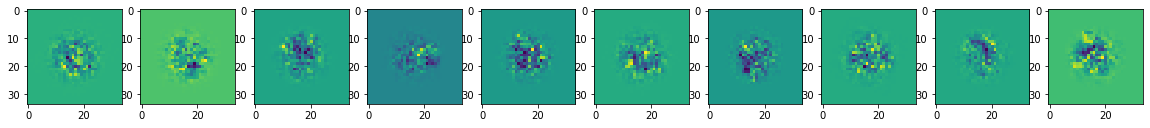

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.002s...
[t-SNE] Computed neighbors for 1600 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 5.610256
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.803398
[t-SNE] KL divergence after 1000 iterations: 0.913168
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([ 4.8219, 16.9127,  9.3543,  1.0507, 21.5134], grad_fn=<DivBackward0>)


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


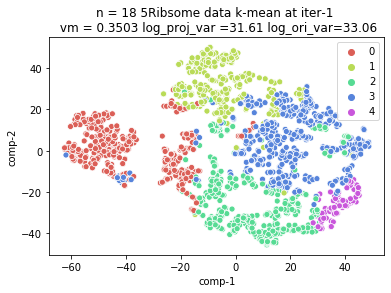

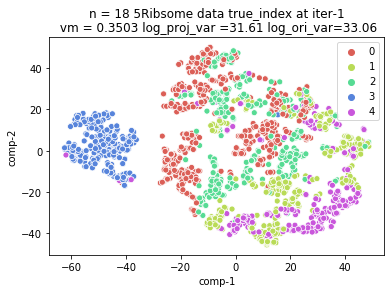

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1115.7442166805267 sec
0 batch 2 iteration
generated


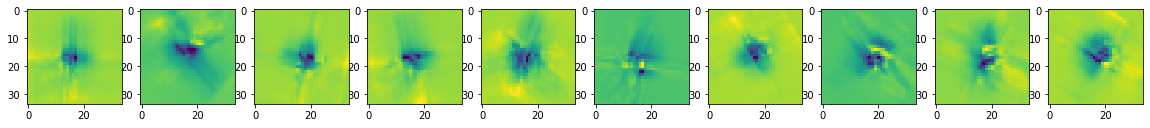

real


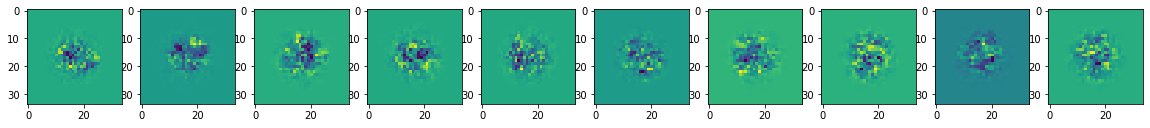

1145.3137164115906 sec
0 batch 3 iteration
generated


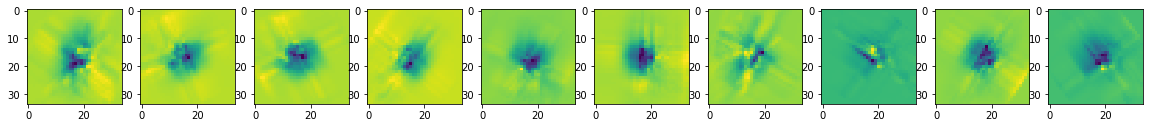

real


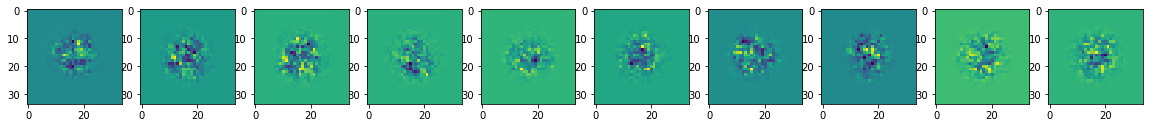

1140.2913227081299 sec
0 batch 4 iteration
generated


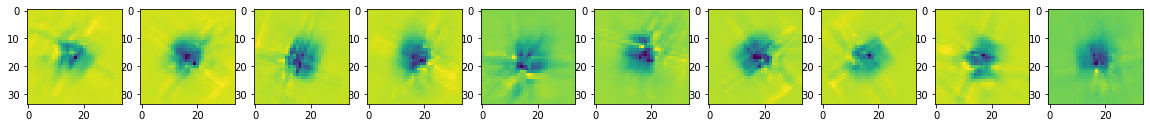

real


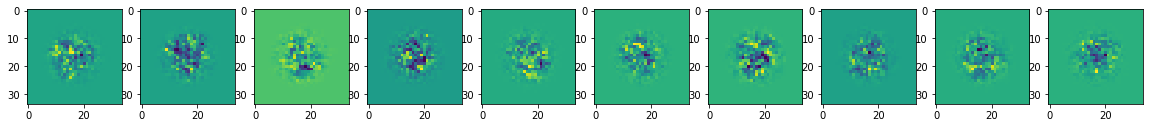

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.001s...
[t-SNE] Computed neighbors for 1600 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 2.423663
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.680943
[t-SNE] KL divergence after 1000 iterations: 0.659684
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([11.6682, 34.3233, 19.4041,  4.6860, 43.3333], grad_fn=<DivBackward0>)


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:522: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


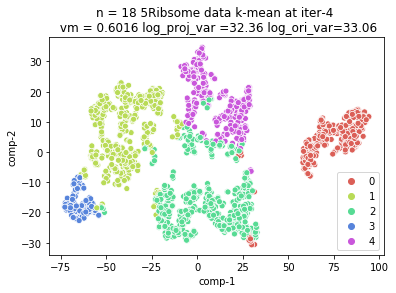

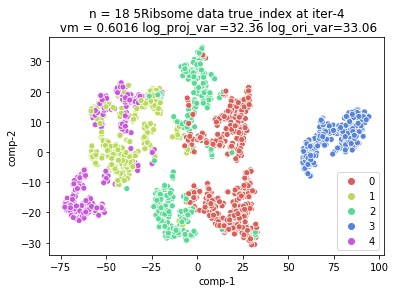

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1151.5326771736145 sec
0 batch 5 iteration
generated


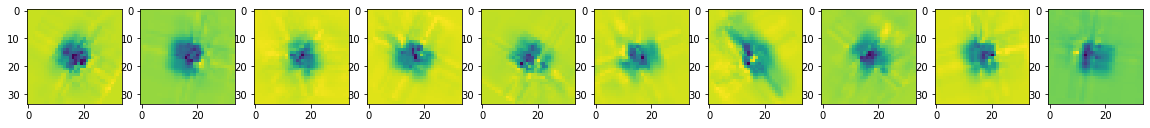

real


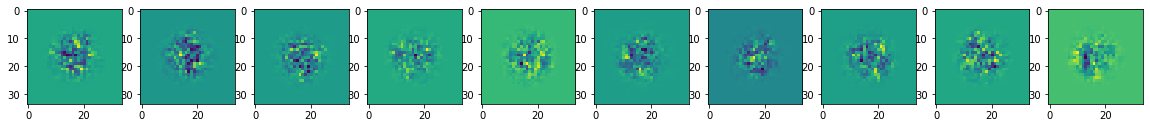

ratio / 5
1155.0724439620972 sec
0 batch 6 iteration
generated


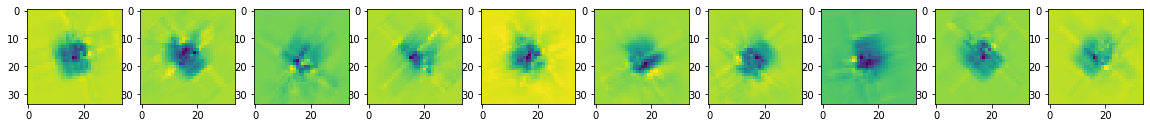

real


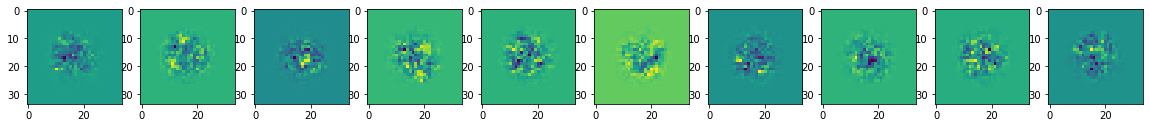

1202.617756843567 sec
0 batch 7 iteration
generated


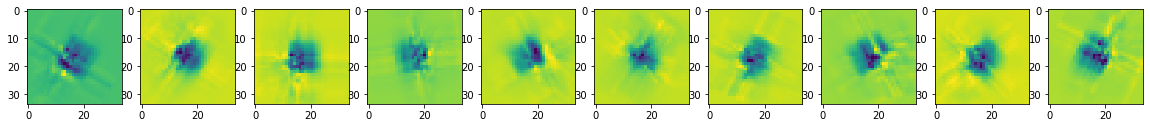

real


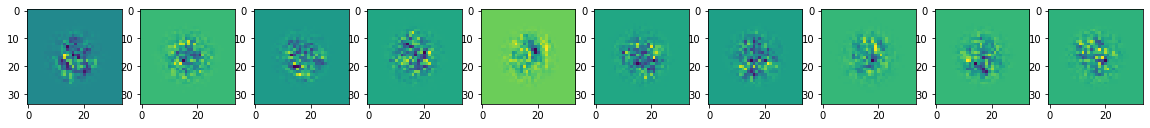

In [ ]:
n_list = [5,8, 10,18,15]
#n_list = [18, 22]#,  22, 10]
n_list.reverse()
b_list = [400,400, 400, 400,400 , 400]#, 100]
#b_list = [ 100, 100, 100]
b_list.reverse()
iter_list = [20 for i in range(len(n_list))]
for i in range(len(n_list)):
    n = n_list[i]
    b = b_list[i]
    niter = iter_list[i]
    Images = new_projection[:9200]
    print(Images.shape)
    exp_name = f'20220205_n_{n}_MPCA_clean_{sn_ratio}_var_dis'
    ProjSize, num_image, n_component , num_iter = 34, 9200, n, niter
    batch_size = b
    Vol_geom = astra.create_vol_geom(34, 34, 34)
    #Images = torch.ones(num_image, 48, 48) # fake images for computing purpose
    """
    Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
    Vol_geom = astra.create_vol_geom(32, 32, 32)
    vg = ts.from_astra(Vol_geom)
    pg = ts.from_astra(Proj_geom)
    op = ts.operator(vg, pg)
    """
    vg = ts.from_astra(Vol_geom)
    pg = ts.from_astra(Proj_geom)
    op = ts.operator(vg, pg)
    MP3 = MPCA_3d_recon(ProjSize, num_image, n_component, op , Images, exp_name, batch_size, niter)
    MP3.fit(start_ratio = 0.1)
"""
MP3.A_pro_All_U()

MP3.Plot_temp()
MP3.Q_Function()

MP3.Expectation()
MP3.Q_Function()
MP3.Maximization()
MP3.Plot_temp()
MP3.Q_Function()
print(MP3.All_U.shape)
"""


In [ ]:
"""
U1 = torch.load('./snap_shot/1229_n_22_MPCA_sigma_j_monitor_0th_55_U1.pt')
U2 = torch.load('./snap_shot/1229_n_22_MPCA_sigma_j_monitor_0th_55_U2.pt')
U3 = torch.load('./snap_shot/1229_n_22_MPCA_sigma_j_monitor_0th_55_U3.pt')
MP3.U1.data = U1.detach()
MP3.U2.data = U2.detach()
MP3.U3.data = U3.detach()
"""

#MP3.fit(start_ratio = 0.1)


In [ ]:
lr = torch.mean(torch.abs(MP3.U1)) * 0.1
print(torch.mean(torch.abs(MP3.U1)))

In [ ]:
#increase batch_size, decrease learning rate
#first load 15 trained component from n = 15 set
"""
U1 = torch.load('./snap_shot/1227_n_18_MPCA_0th_U1.pt')
U2 = torch.load('./snap_shot/1227_n_18_MPCA_0th_U1.pt')
U3 = torch.load('./snap_shot/1227_n_18_MPCA_0th_U1.pt')
MP3.U1.data = U1.detach()
MP3.U2.data = U2.detach()
MP3.U3.data = U3.detach()

"""




#MP3.fit(start_ratio = 0.1)



In [ ]:
MP3.Output_colection()
Coef = np.array(MP3.All_mu)
#Then perform PCA of T-SNE on allMu
print(Coef.shape)

In [ ]:

tsne = TSNE(n_components=2, verbose=1, random_state=123)

"""
x = Coef.reshape(5000, -1)
z = tsne.fit_transform(x) 
"""


In [ ]:
import numpy as np
"""
np.random.seed(0)

indexs = np.random.randint(5, size = 5000)
print(indexs[:10])
df = pd.DataFrame()
df["y"] = indexs
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data true label") 

"""


In [ ]:
print(Coef.shape)
Coef = Coef.reshape(9200, -1)
pca = PCA(n_components=5)
pca.fit(Coef)
P_Coef = pca.transform(Coef)
print(P_Coef.shape)

In [ ]:
z = tsne.fit_transform(P_Coef) 
import numpy as np
np.random.seed(0)


In [ ]:
print(z.shape)
#print(len(indexs))

indexs = Index_3DVA[:9200]
print(indexs[:10])
df = pd.DataFrame()
df["y"] = indexs
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data true label") 


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(P_Coef) #k-mean perform on PCA coef
kmeans.labels_

df = pd.DataFrame()
df["y"] = kmeans.labels_
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data k-mean") 

In [ ]:

print(v_measure_score(indexs, kmeans.labels_))